# Perceptron

### <span style='color:yellow'>The biological, or spiking, neuron models are the mathematical descriptions that study the properties of a certain biological nerve cell. </span>

### <span style='color:yellow'>The perceptron is an ML model that exploits the favor of the biological neuron modeling in building supervised classification models, where it is considered a simplified model of a biological neuron and simulates the behavior of such a cell.</span>

### <span style='color:yellow'>The perception is considered also a single unit of the artificial neural network models that mimics the behavior of the brain neurons.</span>


## Biological modeling
### <span style='color:yellow'>Biologically, each neuron cell has a set of inputs (dendrites) as is illustrated in the following figure. </span>

### <span style='color:yellow'>The inputs are weighted and summed up at the nucleus of the neuron cell.</span>


### <span style='color:yellow'>Thereafter, if the result of the weighted sum among all input reached a certain limit or threshold, then the cell fire a certain signal through the axon to the output terminals. </span>

    
<img src="perceptron.png" width=350>

## Mathmatical  modeling
### <span style='color:yellow'>For vectorized data samples, the feature points of each sample pass through the input units, then each input feature point is weighted, separately, using a specific weight for each input and all weighted inputs are summed to have one representative value.</span>

### <span style='color:yellow'>The representative values are shifted using an additive bias (or intercept) that is predefined for each data sample.</span>
    
### <span style='color:yellow'>The additicve bias prevents the weights of different samples from different classes to pass from the origin, thus the weights for for each different class are adjusted according to the sample bias.</span>

### <span style='color:yellow'>The shifted representative value is passed then through a function, called activation function, to append non-linearity properties to the representative value.</span>

### <span style='color:yellow'>There are many different activation functions that can be utilized including the unit step (which will be used in this tutorial), sigmoid, relu, among others.</span>

<img src="math_model.png" width=350>pip install nbconvert


## Linear model
$$
   \Large{{z= f({w,b})  = w^{\intercal}x + b}}
$$

## Activation function
### <span style='color:yellow'>In this tutorial we use the unit step activation function that equal to if I its input,z, is greater than or equal to a certain threshold t:</span>

$$
    \LARGE{g(z)  = 1, z \geq  t} 
$$

$$
    \LARGE{g(z)  = 0, \mathrm{otherwise}} 
$$

<img src="step_function.png" width=350>

## Prediction (approximation)
$$
   \Large{\hat{y} = g{(f({w,b}))  = w^{\intercal}x + b}}
$$

### <span style='color:yellow'>Remember, the model output is a dependent variable, x is given, and the only changeable parameters that must be adjusted and optimized are w and b. Accordingly, we compute the gradient iteratively until reaching the optimal solution.</span>

## Optimization and update rule
### <span style='color:yellow'>At each iteration and for each sample, we come up with the derivative of the weights and update their current values according to that derivative, i.e, gradient.</span>

### <span style='color:yellow'> In this tutorial, we consider heuristic rule-based (called perceptron update rule) to update the weights for each data sample in lieu of the loss function and gradient descent.</span>

### <span style='color:yellow'> Considering binary classification problem:</span>

$$
\Large{dw=(y_i-\hat{y}_i).x_i}
$$


## Update rule  with learning rate integration

$$
\Large{
\begin{aligned}
& \text {Rule representation}\\
&\begin{array}{ccc}
\hline \hline y & \hat{y}& {y-\hat{y}} \\
\hline 
 1 & 1 & 0 \\
 1 & 0 & 1 \\
 0 & 0 & 0 \\
 0 & 1 & -1 \\
\hline
\end{array}
\end{aligned}}
$$

### <span style='color:yellow'> As it is noticed from the update rule representation table, if the difference between both actual and predicted labels) is equal to 0, then the gradient of the weights will be 0 and the optimization algorithm is being converged to the optimal solution.</span>

### <span style='color:yellow'>  If the difference between both actual and predicted labels) is not equal to 0, then the gradient will be decreasing or increase till reaches 0.

$$
\Large{w:= w+\alpha (dw)}
$$

In [34]:
'Importing relevent modules and libs'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap=ListedColormap(['#FF0000','#00FF00'])

In [84]:
'Creating an artificial dataset'
X,y=datasets.make_blobs(n_samples=500,n_features=2,cluster_std=1.02,centers=2,shuffle=True,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,shuffle=True,random_state=1324)

In [85]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

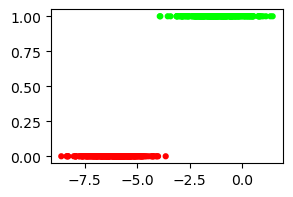

In [86]:
'Visualize the first feature of the data'
fig,ax=plt.subplots(1,figsize=(3,2))
ax.scatter(X[:,0],y,c=y,cmap=cmap,marker='o',s=12)

In [87]:
'Building the Perceptron class'
class Percepron:
    def __init__(self,lr=0.01,n_iteration=500):
        self.lr=lr
        self.n_iteration=n_iteration
        self.weight=None
        self.bias=None
    
    def fit(self,X,y):
        pass
    def predict(self,X):
        pass
    

In [88]:
'Defining fit method the Perceptron class'
class Percepron:
    def __init__(self,lr=0.01,n_iteration=500):
        self.lr=lr
        self.n_iteration=n_iteration
        self.weights=None
        self.bias=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        # Check if each label either 0 or 1
        y_=np.where(y>0,1,0)
        
        
    def predict(self,X):
        pass
    

In [96]:
'Optimizing the trainig step and update the gradient'
class Percepron:
    def __init__(self,lr=0.01,n_iteration=500):
        self.lr=lr
        self.n_iteration=n_iteration
        self.weights=None
        self.bias=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        # Check if each label either 0 or 1
        y_=np.where(y>0,1,0)
        
        for _ in range(self.n_iteration):
            # update the weight for each sample
            for idx,x in enumerate(X):
                linear_model=np.dot(x,self.weights)+self.bias
                # we need a special method to perform the activation
        
        
    def predict(self,X):
        pass
    

In [97]:
'Defining the unit step activation function'
class Percepron:
    def __init__(self,lr=0.01,n_iteration=500):
        self.lr=lr
        self.n_iteration=n_iteration
        self.weights=None
        self.bias=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        # Check if each label either 0 or 1
        y_=np.array([1 if i >0 else 0 for i in y])
        
        for _ in range(self.n_iteration):
            # update the weight for each sample
            for idx,x_i in enumerate(X):
                linear_model=np.dot(x_i,self.weights)+self.bias
                # we need a special method to perform the activation
                y_predicted= self._activaion_unit_step(linear_model)
                
                update_rule=(y_[idx]-y_predicted)*self.lr
                self.weights+=update_rule*x_i
                self.bias+=update_rule
                             
        
    def predict(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        y_predicted= self._activaion_unit_step(linear_model)
        return y_predicted
    
    def _activaion_unit_step(self,lin_mod):
        return np.where(lin_mod>=0,1,0)
    @staticmethod
    def accuracy(y_true,y_pred):
        accu= np.sum(y_true==y_pred)/len(y_true)
        return accu


In [98]:
clf=Percepron(lr=0.001,n_iteration=2000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [99]:
accuracy=clf.accuracy(y_test,y_pred)
accuracy


0.992

In [100]:
print(y_test)
print(y_pred)


[1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1]
[1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0

In [101]:
'Let us draw the hyperplane'
def hyperplane_y_coordinate(x,w,b,shift):
    return (-w[0] * x + b + shift)/w[1]

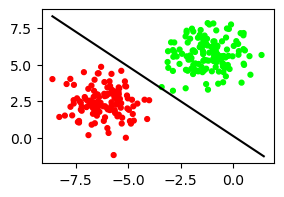

In [102]:
fig,ax=plt.subplots(1,figsize=(3,2))
ax.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train,s=12,cmap=cmap)
lower_x_coordinate=np.amin(X[:,0])
higher_x_coordinate=np.amax(X[:,0])
x1_1_hyper_plane=hyperplane_y_coordinate(lower_x_coordinate,clf.weights,clf.bias,0)
x1_2_hyper_plane=hyperplane_y_coordinate(higher_x_coordinate,clf.weights,clf.bias,0)
ax.plot([lower_x_coordinate,higher_x_coordinate],[x1_1_hyper_plane,x1_2_hyper_plane],'k')
plt.show()